# 1. Feature Selection

In [1]:
%pwd

'/Users/a06411/Documents/GitHub/js_automl_pycaret/lending_club_da'

In [2]:
path = '/Users/a06411/Documents//GitHub/js_automl_pycaret/lending_club_data/lending_club_2012.csv'

In [3]:
import pandas as pd
import numpy as np
import pickle, os
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(path)

In [5]:
df = df.dropna(axis=1)

In [6]:
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,1884897,2828755,2000.0,2000.0,2000.0,36 months,17.27,71.58,C,C5,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
1,1884996,2828209,7750.0,7750.0,7750.0,36 months,13.11,261.54,B,B4,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
2,1885018,2634739,4500.0,4500.0,4500.0,36 months,19.05,165.07,D,D4,...,1.0,Individual,0.0,0.0,0.0,1.0,0.0,N,Cash,N
3,1885075,2837824,20850.0,20850.0,20850.0,60 months,17.77,526.85,D,D1,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N
4,1885119,2837644,12000.0,12000.0,12000.0,36 months,14.33,412.06,C,C1,...,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N


In [7]:
df = df.drop("Unnamed: 0", axis=1)

In [8]:
df.shape

(53367, 54)

In [9]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag'],
     

In [10]:
df['grade'].value_counts()

B    18507
C    11875
A    10901
D     7323
E     3185
F     1315
G      261
Name: grade, dtype: int64

In [11]:
df['loan_status'].value_counts()

Fully Paid     44723
Charged Off     8644
Name: loan_status, dtype: int64

## 연체 비율 처리 

In [12]:
total = df['loan_status'].value_counts()['Fully Paid'] + df['loan_status'].value_counts()['Charged Off']

In [13]:
df['loan_status'].value_counts()['Charged Off']/total

0.1619727546985965

In [14]:
df['loan_status'].value_counts()['Fully Paid']/total

0.8380272453014035

# ANOVA 분석 


## ANOVA(Analysis of Variance) 분석
- 여러 그룹 간의 평균 차이를 비교하는 통계적 방법 중 하나입니다.
- ANOVA는 그룹 간 변동과 그룹 내 변동을 비교하여 평균 간 차이의 통계적 유의성을 평가하는 도구로서

## 다음과 같은 목적으로 사용됩니다:

### 그룹 간 차이 검증: 
- ANOVA는 세 개 이상의 그룹(조건 또는 처리) 간의 평균 차이를 확인하는 데 사용됩니다.
- 예를 들어 제품 A, B, C의 평균 판매량이 유의미하게 다른지를 평가하거나, 강의 방식 A, B, C의 학생 성적 평균이 차이가 있는지를 분석할 수 있습니다.

### 실험 설계와 연구 비교: 
- 실험 또는 연구에서 여러 개의 처리 또는 조건을 비교하고자 할 때 ANOVA는 각 처리 또는 조건 간의 차이를 확인하는 데 유용합니다.
- 실험적인 변인이 결과에 미치는 영향을 확인하고 이해하는 데 활용됩니다.

### 다중 그룹 비교: 
- ANOVA는 ANOVA의 결과가 유의하다고 판단된 경우, 추가적으로 어떤 그룹 간의 평균 차이가 있는지를 확인하기 위한 사후 분석(Post hoc analysis)을 수행할 수 있습니다.
- 일반적으로는 Tukey's HSD, Bonferroni 등의 방법을 사용합니다.

### 변동 요인 파악: 
- ANOVA는 그룹 간 변동과 그룹 내 변동을 분해하여 각 요인의 기여도를 파악할 수 있습니다.
- 이를 통해 어떤 요인이 결과에 큰 영향을 미치는지를 확인할 수 있습니다.

### 모델 선택과 설명력: 
- ANOVA는 독립 변수들이 종속 변수에 얼마나 큰 영향을 미치는지를 평가하는데 사용되며, 변수 선택과 모델의 설명력 증진에 도움이 될 수 있습니다.

ANOVA Feature Selection - Continuous Variable(top 50 sorted by F-value)

In [15]:
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import SelectKBest

In [16]:
df['loan_status'].value_counts()

Fully Paid     44723
Charged Off     8644
Name: loan_status, dtype: int64

In [17]:
num_col = np.setdiff1d(df.select_dtypes('number').columns.values, ['id','loan_status'])

In [18]:
num_col

array(['acc_now_delinq', 'annual_inc', 'chargeoff_within_12_mths',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'delinq_2yrs', 'delinq_amnt', 'dti', 'fico_range_high',
       'fico_range_low', 'funded_amnt', 'funded_amnt_inv',
       'inq_last_6mths', 'installment', 'int_rate',
       'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt',
       'loan_amnt', 'open_acc', 'out_prncp', 'out_prncp_inv',
       'policy_code', 'pub_rec', 'pub_rec_bankruptcies', 'recoveries',
       'revol_bal', 'tax_liens', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee',
       'total_rec_prncp'], dtype=object)

In [19]:
X, y = df[num_col], df['loan_status']


## "SelectKBest"는 
- 특성 선택(feature selection) 기법 중 하나로, 주어진 데이터에서 중요한 특성들을 선택하는데 사용되는 방법입니다. 
- 특성 선택은 머신 러닝 모델의 성능을 향상시키기 위해 데이터의 중요한 특성들을 선택하여 노이즈나 불필요한 정보를 줄이는 목적으로 사용됩니다.

### 매개변수 
- f_classif는 분류 작업에서 ANOVA F-value를 사용하여 특성의 중요도를 평가하는 함수입니다.
- k 매개변수는 선택할 특성의 개수를 나타냅니다.


In [20]:
selector = SelectKBest(f_classif, k=30)
selector.fit(X,y)

SelectKBest(k=30)

## 특성 확인 
- get_support 메서드를 사용하여 선택된 특성의 인덱스를 확인할 수 있습니다.

In [21]:
cols = selector.get_support(indices = True)

In [22]:
cols

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [23]:
df_anova = df.iloc[:,cols]
print(df_anova.shape)

(53367, 30)


In [24]:
cols = X.columns.values[selector.get_support()]
scores = np.round(selector.scores_[selector.get_support()]*0.1, 2)
cols_scores = list(zip(cols, scores))

In [25]:
ns_df = pd.DataFrame(data = cols_scores, columns=['Feat_names', 'F_Scores'])
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)  

                    Feat_names  F_Scores
14        last_fico_range_high   1738.34
21                  recoveries   1646.05
15         last_fico_range_low   1311.95
29             total_rec_prncp    802.35
2      collection_recovery_fee    583.32
16             last_pymnt_amnt    359.35
25                 total_pymnt    306.84
26             total_pymnt_inv    306.58
13                    int_rate    219.05
7              fico_range_high     85.37
8               fico_range_low     85.37
28          total_rec_late_fee     78.93
17                   loan_amnt     25.10
9                  funded_amnt     24.86
10             funded_amnt_inv     24.57
11              inq_last_6mths     24.38
6                          dti     23.57
12                 installment     13.83
0                   annual_inc     10.95
18                    open_acc      2.49
27               total_rec_int      2.45
19                     pub_rec      2.00
20        pub_rec_bankruptcies      1.72
22              

#  ML Model

## (3-1) LGBM

In [26]:
import time
import lightgbm as lgb
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score , average_precision_score 
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve ,auc , log_loss ,  classification_report 
from sklearn.model_selection import StratifiedKFold , KFold, GroupKFold, cross_val_score
from sklearn import metrics

import gc, warnings
warnings.filterwarnings('ignore')

In [27]:
remove_features = ['id', 'loan_status','earliest_cr_line', 
                   'issue_d', 'last_credit_pull_d', 'last_pymnt_d', 
                   'next_pymnt_d','Unnamed: 0']

In [28]:
###VARS

SEED = 2021
# LOCAL_TEST = True
# MAKE_MODEL_TEST = True
TARGET = 'loan_status'
target = 'grade'

In [29]:
features_columns = [col for col in list(df) if col not in remove_features]

In [30]:
df[features_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53367 entries, 0 to 53366
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   53367 non-null  float64
 1   funded_amnt                 53367 non-null  float64
 2   funded_amnt_inv             53367 non-null  float64
 3   term                        53367 non-null  object 
 4   int_rate                    53367 non-null  float64
 5   installment                 53367 non-null  float64
 6   grade                       53367 non-null  object 
 7   sub_grade                   53367 non-null  object 
 8   home_ownership              53367 non-null  object 
 9   annual_inc                  53367 non-null  float64
 10  verification_status         53367 non-null  object 
 11  pymnt_plan                  53367 non-null  object 
 12  url                         53367 non-null  object 
 13  purpose                     533

### 숫자 피처만 선택 

In [31]:
df_f = df.select_dtypes(include="number")

In [32]:
df_ff = df_f.drop(['id'] ,axis=1)

In [33]:
X,y = df_ff, df[TARGET]

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53367 entries, 0 to 53366
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   53367 non-null  float64
 1   funded_amnt                 53367 non-null  float64
 2   funded_amnt_inv             53367 non-null  float64
 3   int_rate                    53367 non-null  float64
 4   installment                 53367 non-null  float64
 5   annual_inc                  53367 non-null  float64
 6   dti                         53367 non-null  float64
 7   delinq_2yrs                 53367 non-null  float64
 8   fico_range_low              53367 non-null  float64
 9   fico_range_high             53367 non-null  float64
 10  inq_last_6mths              53367 non-null  float64
 11  open_acc                    53367 non-null  float64
 12  pub_rec                     53367 non-null  float64
 13  revol_bal                   533

## 데이터 분리 

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


## 모델 적용 

In [36]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)


LGBMClassifier()

## 예측 

In [37]:
# predict the results
y_pred=clf.predict(X_test)

## 정확도 확인 

In [38]:
# view auc score
from sklearn.metrics import accuracy_score
print('LightGBM Model AUC score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model AUC score: 0.9991


## 시각화 

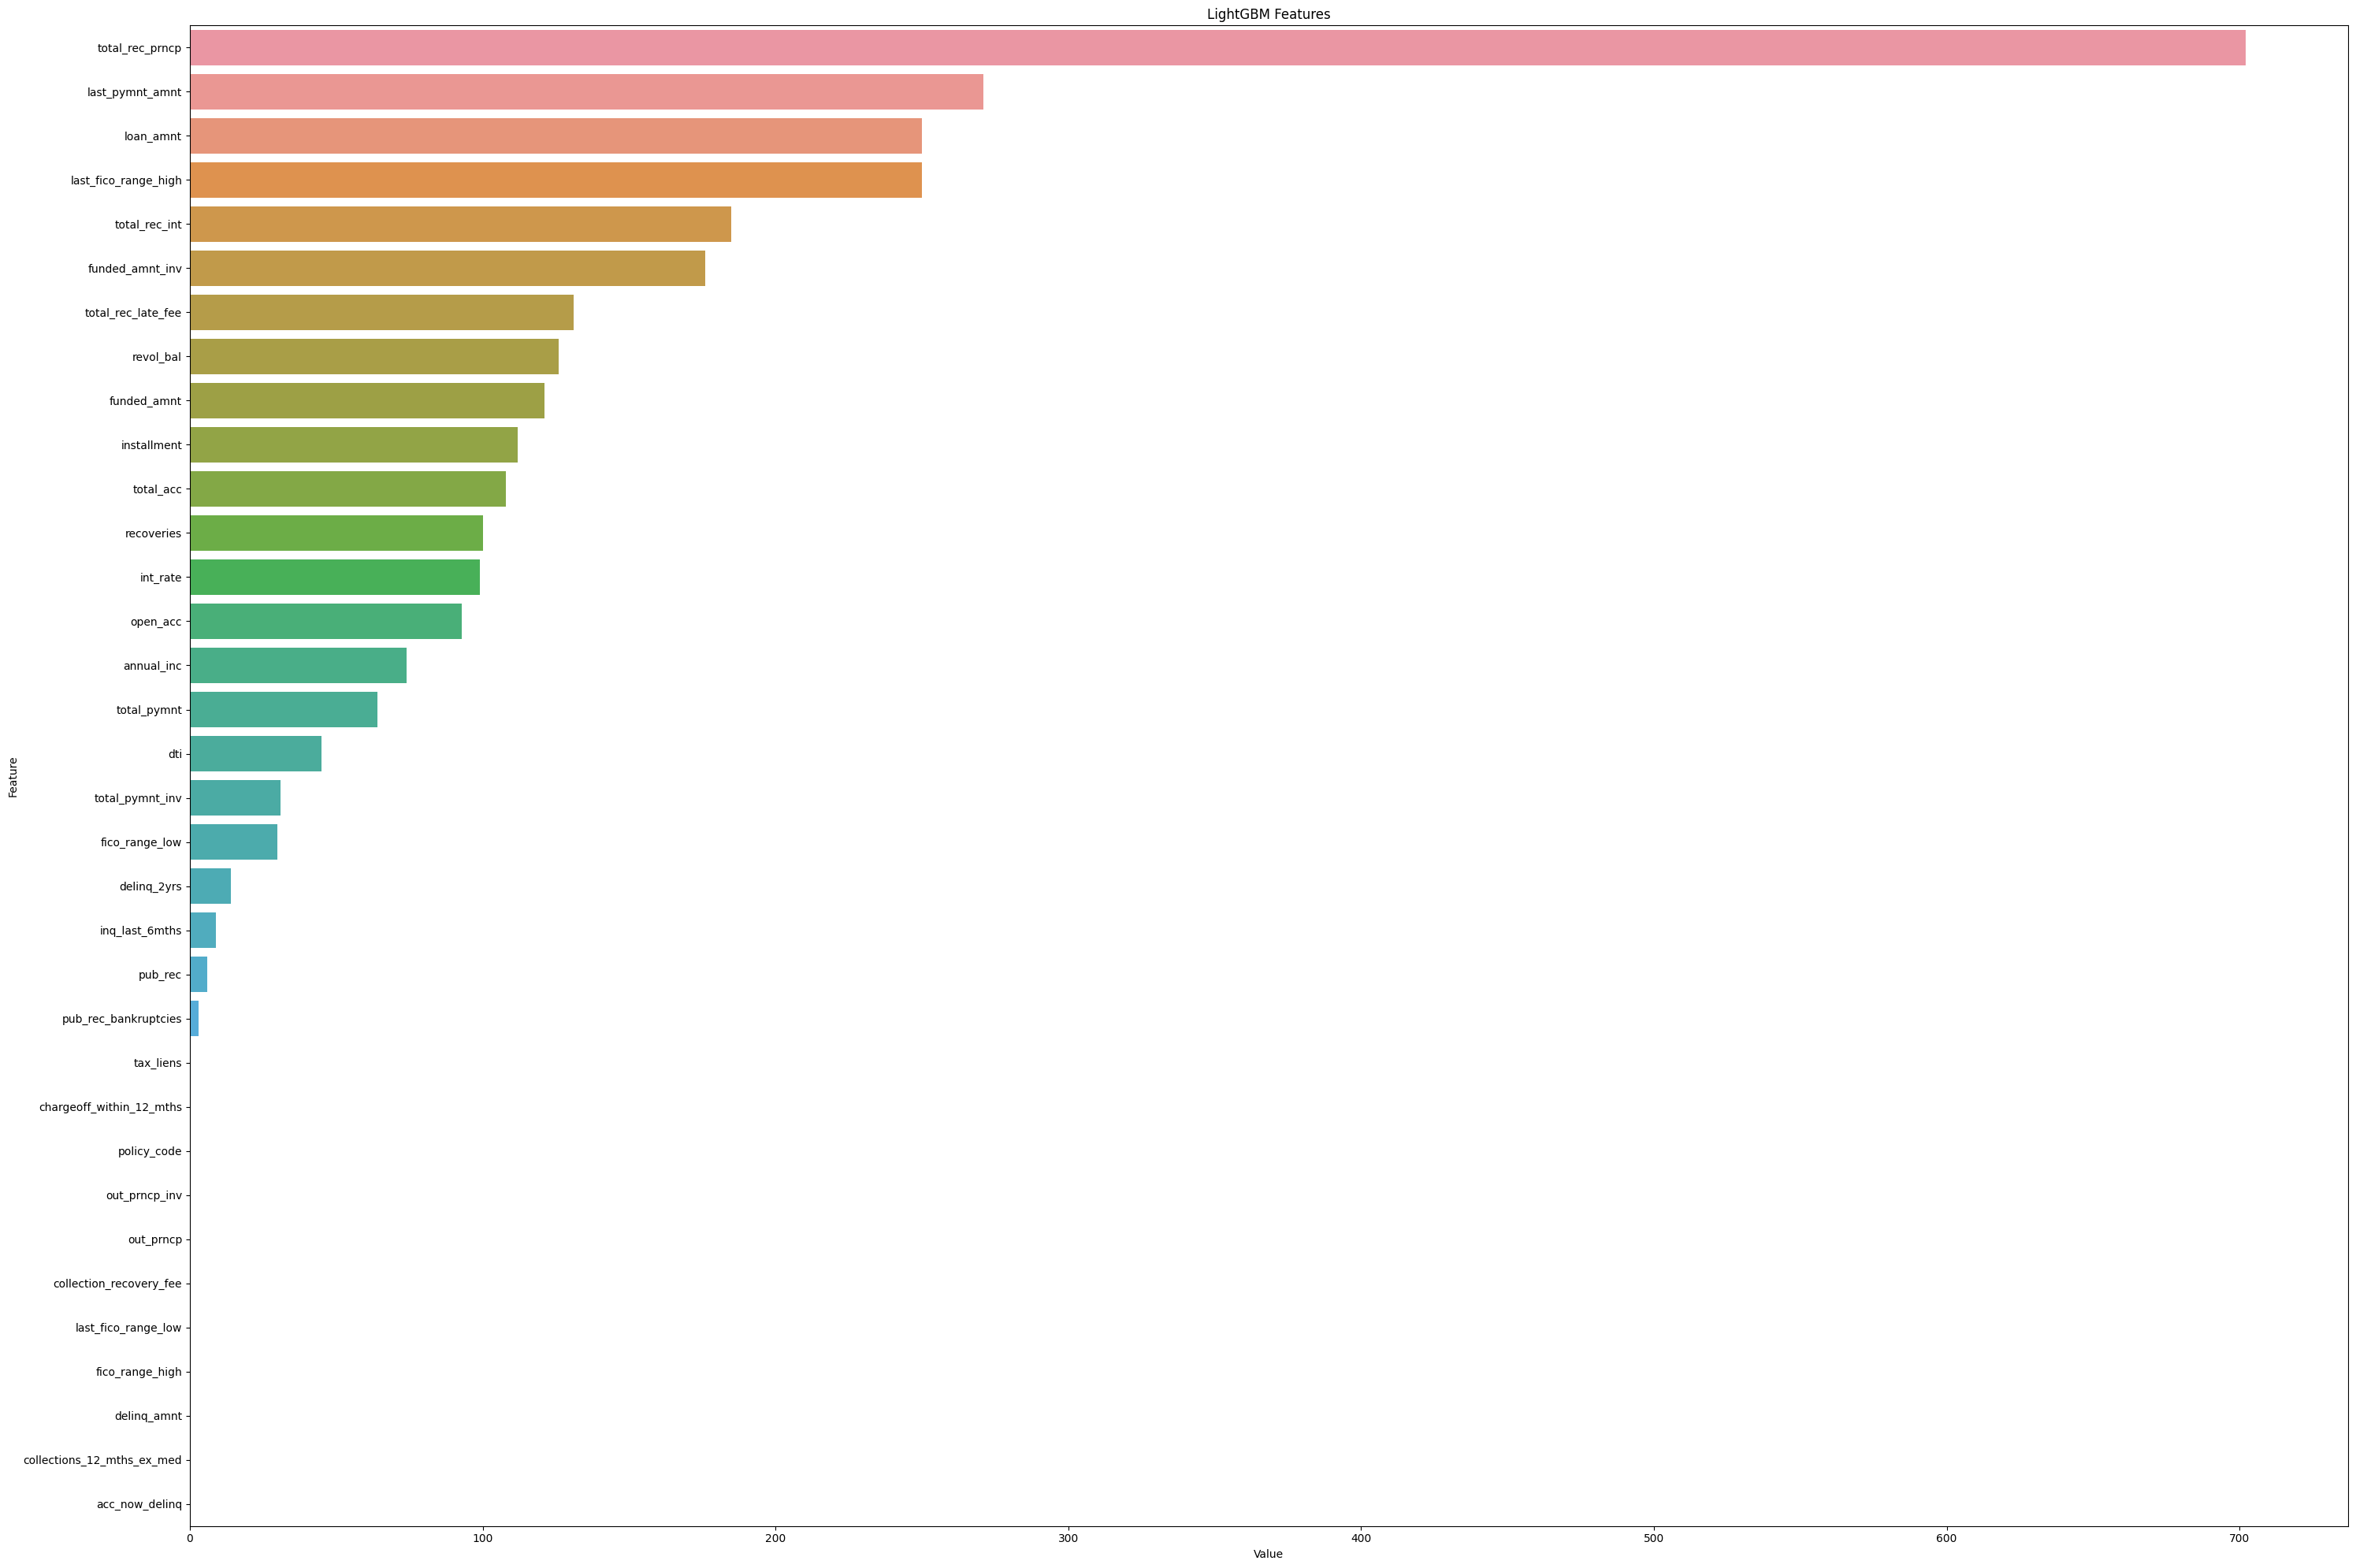

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_imp = pd.DataFrame(sorted(zip(X.columns,clf.feature_importances_)), columns=['Feature','Value'])

plt.figure(figsize=(30, 20))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [40]:
feature_imp.sort_values(by="Value", ascending=False).head()

,Feature,Value
33,total_rec_prncp,702
17,last_pymnt_amnt,271
18,loan_amnt,250
15,last_fico_range_high,250
31,total_rec_int,185


In [41]:
lgb_imp = feature_imp.sort_values(by="Value", ascending=False).head(40).Feature.tolist()
lgb_imp

['total_rec_prncp',
 'last_pymnt_amnt',
 'loan_amnt',
 'last_fico_range_high',
 'total_rec_int',
 'funded_amnt_inv',
 'total_rec_late_fee',
 'revol_bal',
 'funded_amnt',
 'installment',
 'total_acc',
 'recoveries',
 'int_rate',
 'open_acc',
 'annual_inc',
 'total_pymnt',
 'dti',
 'total_pymnt_inv',
 'fico_range_low',
 'delinq_2yrs',
 'inq_last_6mths',
 'pub_rec',
 'pub_rec_bankruptcies',
 'tax_liens',
 'chargeoff_within_12_mths',
 'policy_code',
 'out_prncp_inv',
 'out_prncp',
 'collection_recovery_fee',
 'last_fico_range_low',
 'fico_range_high',
 'delinq_amnt',
 'collections_12_mths_ex_med',
 'acc_now_delinq']

In [42]:
lgb_imp += ['loan_status']

In [43]:
df[lgb_imp].to_csv('../lending_club_data/lgb_selected_default.csv')

### Correlation Matrix

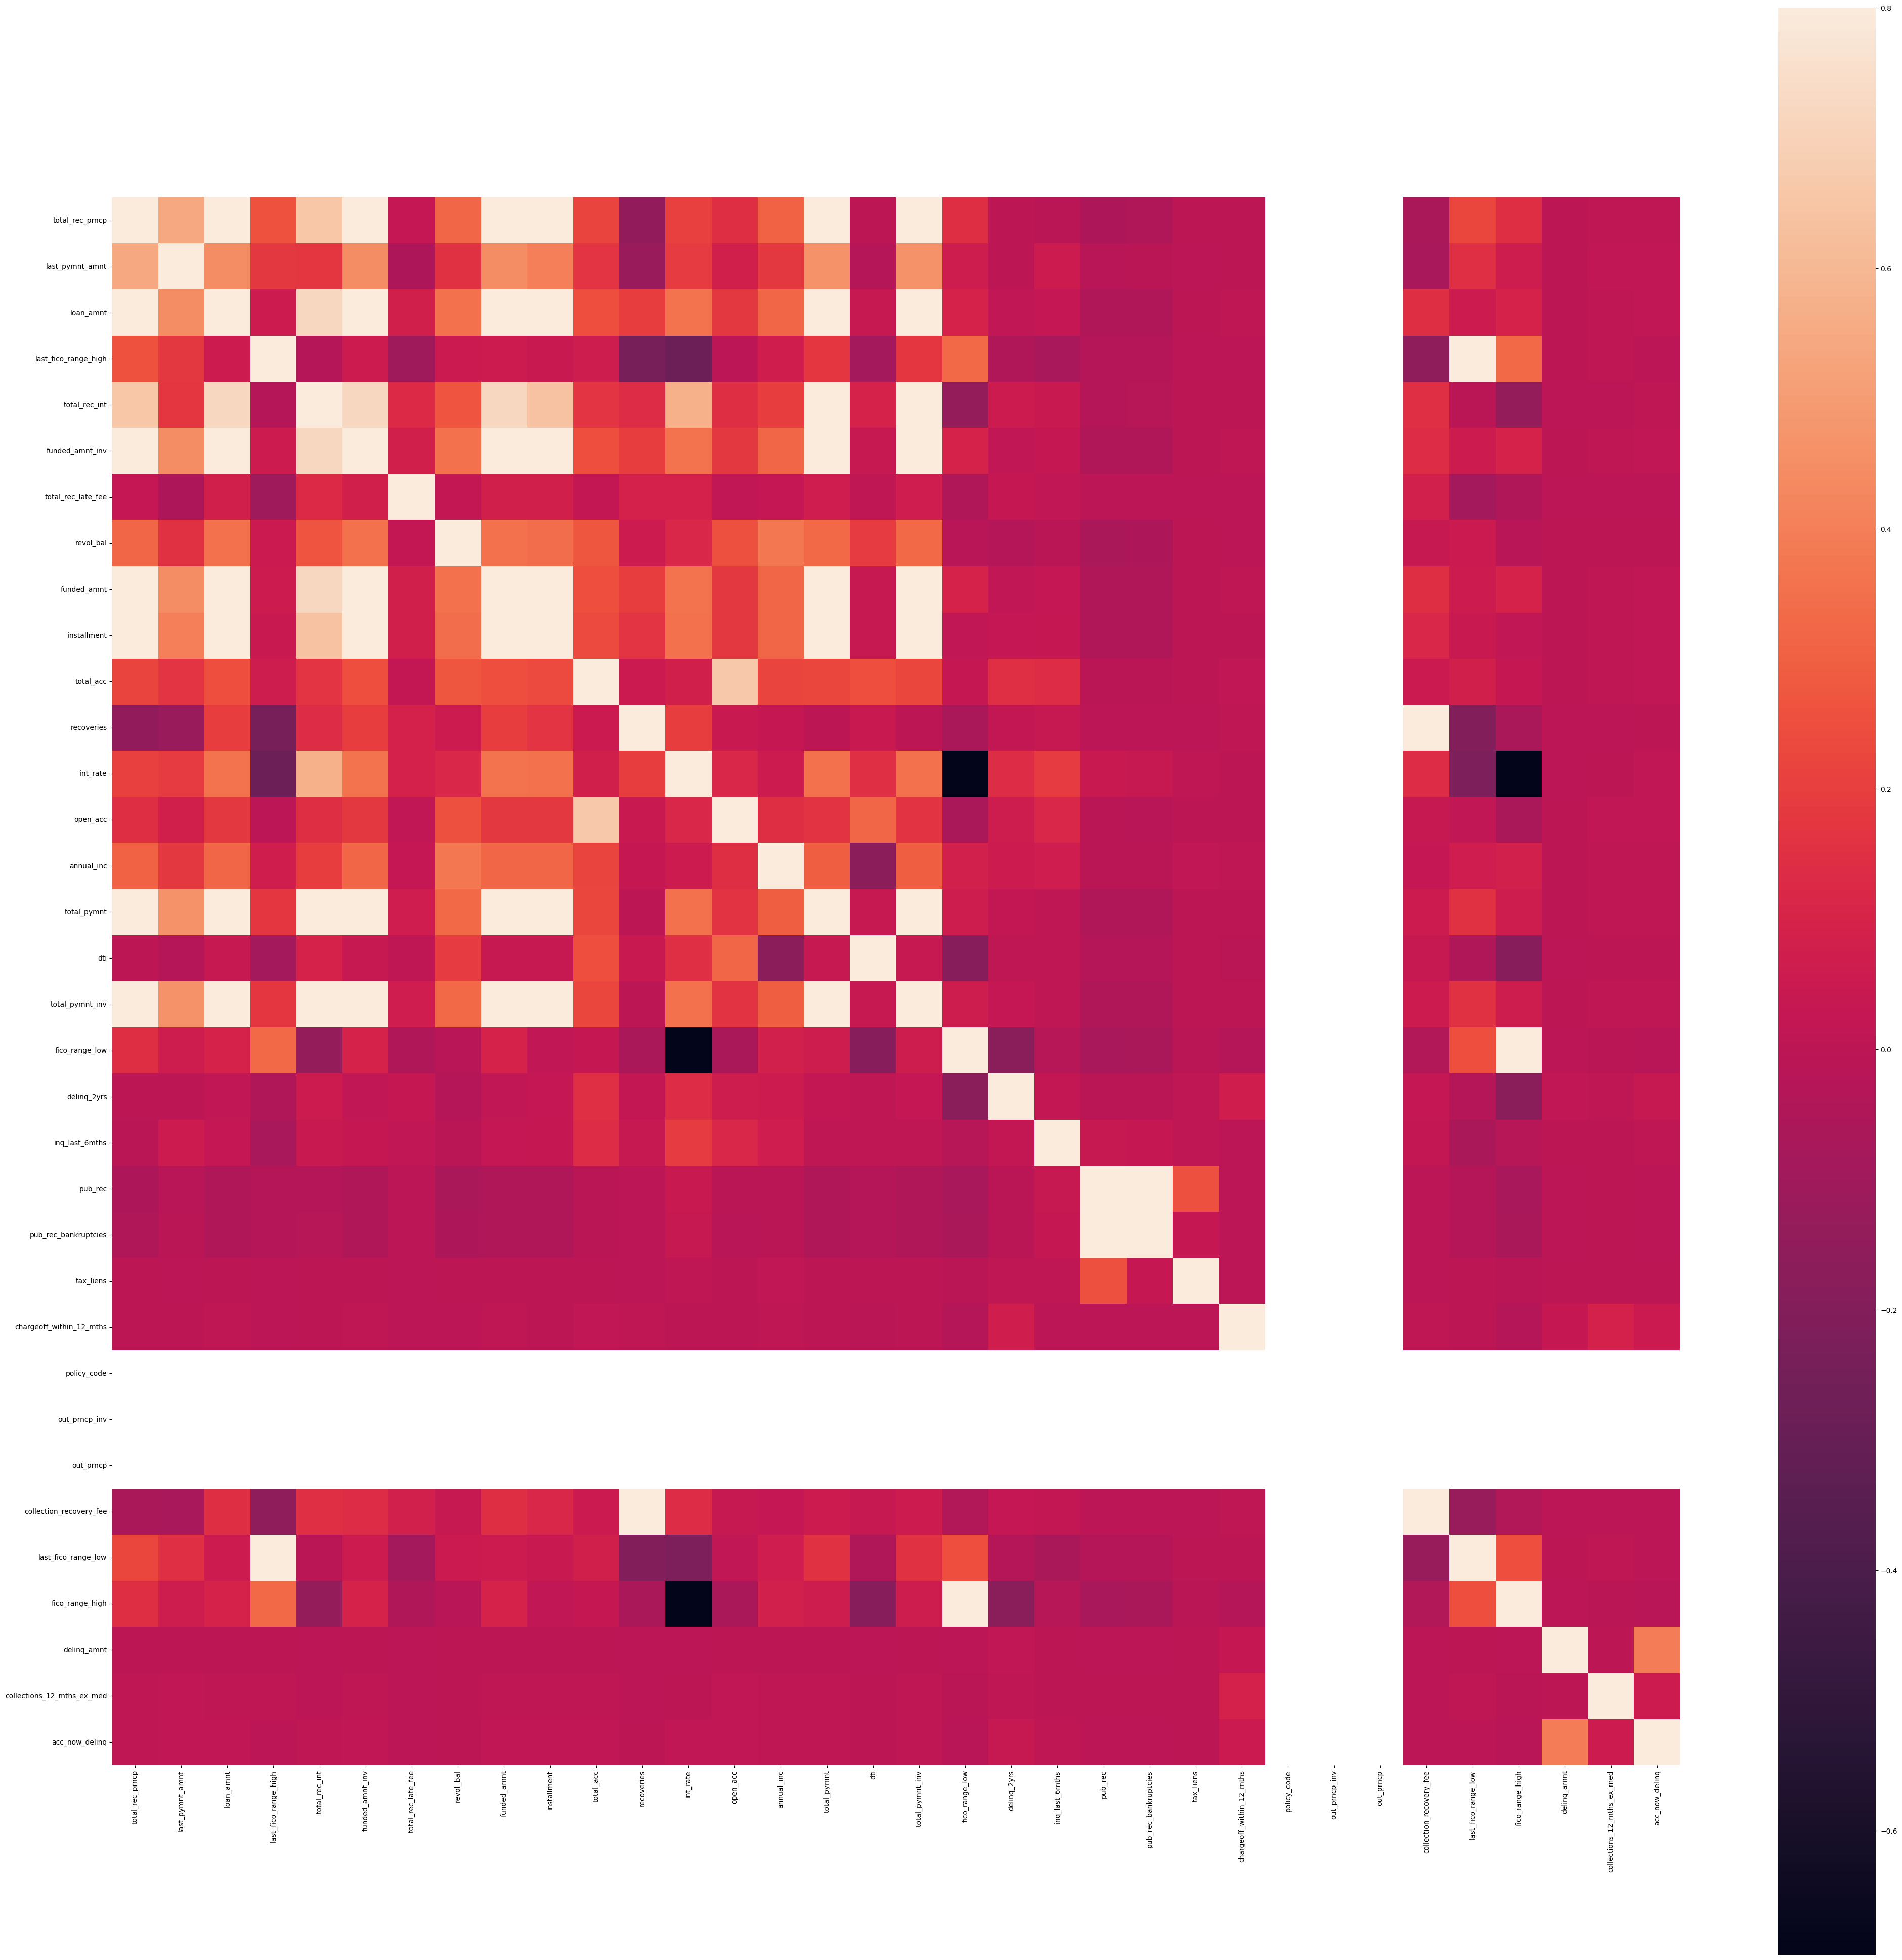

In [44]:
#correlation matrix
corrmat = df[lgb_imp].corr()
f, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(corrmat, vmax=.8, square=True);

## 모델 해석 :  SHAP

In [45]:
df_sample = X_train.copy()
df_sample.sample(frac=0.1, replace=True, random_state=2020)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
19436,9600.0,9600.0,9600.0,16.29,338.89,77000.0,14.90,1.0,670.0,674.0,...,2580.83,719.0,715.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30100,4000.0,4000.0,4000.0,6.62,122.82,55000.0,20.03,0.0,750.0,754.0,...,2121.13,804.0,800.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42714,18000.0,18000.0,18000.0,7.90,563.23,63000.0,15.70,0.0,725.0,729.0,...,565.49,719.0,715.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
45826,11200.0,11200.0,11200.0,7.90,350.46,82000.0,13.36,0.0,725.0,729.0,...,354.00,779.0,775.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
52575,35000.0,35000.0,34925.0,12.69,790.82,68000.0,8.58,0.0,790.0,794.0,...,34.95,619.0,615.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35336,8875.0,8875.0,8875.0,15.81,311.19,42000.0,20.17,0.0,670.0,674.0,...,4022.57,514.0,510.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
38137,6000.0,6000.0,6000.0,17.27,214.73,32000.0,22.99,0.0,660.0,664.0,...,275.00,659.0,655.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
44713,12000.0,12000.0,11975.0,12.12,399.26,27600.0,21.96,0.0,690.0,694.0,...,804.12,679.0,675.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
31342,8000.0,8000.0,8000.0,6.03,243.49,58000.0,9.77,0.0,785.0,789.0,...,247.58,694.0,690.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [46]:
import shap
shap.__version__ 

'0.41.0'

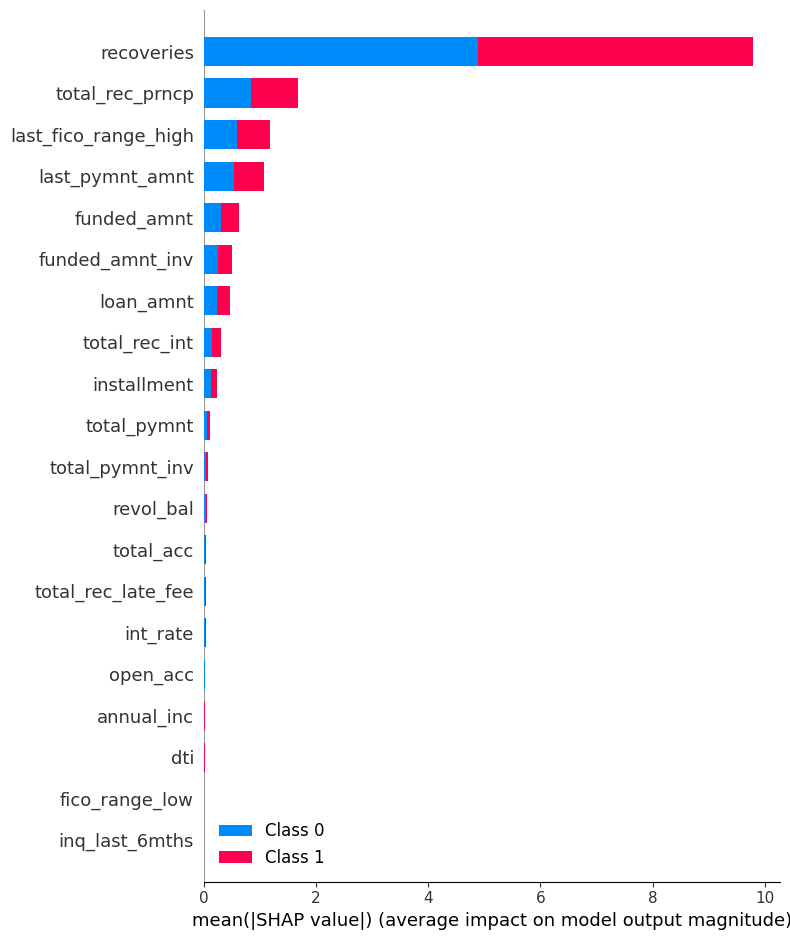

In [47]:
shap_values = shap.TreeExplainer(clf).shap_values(df_sample)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [48]:
feature_names = X_train.columns.values
feature_importance = pd.DataFrame(list(zip(feature_names, shap_values[0].sum(0))), columns=['feature_name', 'feature_importance_vals'])
feature_importance = feature_importance.iloc[(-np.abs(feature_importance['feature_importance_vals'].values)).argsort()]
feat_imp = feature_importance['feature_name'].head(60).values.tolist()

In [49]:
df[feat_imp+['loan_status']].to_csv('../lending_club_data/shap_selected_default.csv')